In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [20]:
df=pd.read_csv('fmnist_small.csv')

In [21]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


In [22]:
df.shape

(6000, 785)

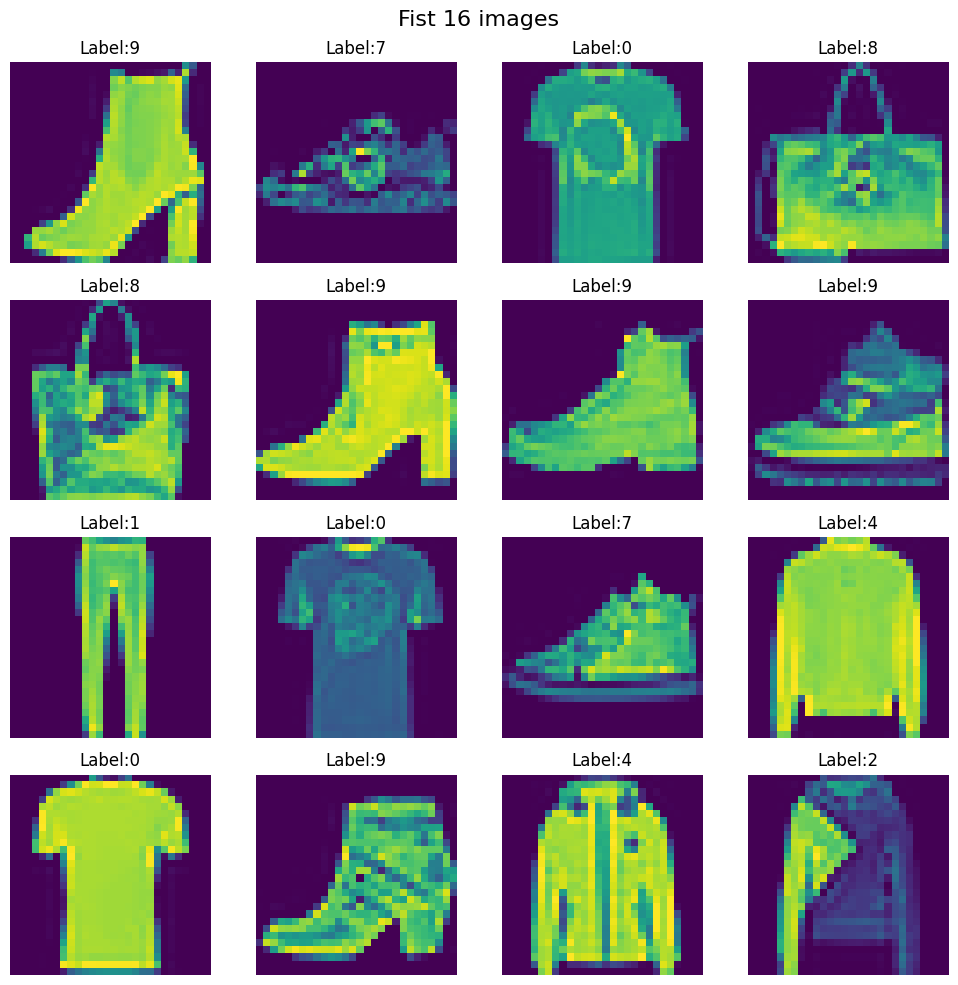

In [23]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("Fist 16 images",fontsize=16)

for i,ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label:{df.iloc[i,0]}")

plt.tight_layout()
plt.show()



In [24]:
df.iloc[:,0].unique()

array([9, 7, 0, 8, 1, 4, 2, 6, 5, 3])

In [25]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# scaling the fetaures

X_train=X_train/255.0
X_test=X_test/255.0

In [28]:
class CustomDataset(Dataset):
  def __init__(self,fetaures,labels):
    self.fetaures=torch.tensor(fetaures,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)

  def __getitem__(self,idx):
    return self.fetaures[idx],self.labels[idx]


  def __len__(self):
    return len(self.fetaures)



In [29]:
train_dataset=CustomDataset(X_train,y_train)


In [30]:
test_dataset=CustomDataset(X_test,y_test)

In [31]:
# Data loader
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [41]:
# define NN class

class MyNN(nn.Module):

  def __init__(self,num_fetaures):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_fetaures,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)

    )

  def forward(self,x):
    return self.model(x)


In [42]:
epochs=100
learning_rate=0.1

In [43]:
model=MyNN(X_train.shape[1])

criterion=nn.CrossEntropyLoss()

optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [44]:
len(train_loader)

150

In [45]:
for epoch in range(epochs):

  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:

    outputs=model(batch_features)

    loss=criterion(outputs,batch_labels)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    total_epoch_loss=total_epoch_loss+loss.item()

  print(f"Epoch:{epoch+1}/{epochs}, Loss:{total_epoch_loss/len(train_loader)}")




Epoch:1/100, Loss:1.3868501194318135
Epoch:2/100, Loss:0.7967492741346359
Epoch:3/100, Loss:0.6713692714770635
Epoch:4/100, Loss:0.6021381302674611
Epoch:5/100, Loss:0.568137968579928
Epoch:6/100, Loss:0.5142381425698598
Epoch:7/100, Loss:0.48253407528003056
Epoch:8/100, Loss:0.45778719514608385
Epoch:9/100, Loss:0.42374796748161314
Epoch:10/100, Loss:0.40885704388221106
Epoch:11/100, Loss:0.39141791929801306
Epoch:12/100, Loss:0.3736611281832059
Epoch:13/100, Loss:0.3442521386841933
Epoch:14/100, Loss:0.33920555050174395
Epoch:15/100, Loss:0.32474838743607204
Epoch:16/100, Loss:0.32324704001347226
Epoch:17/100, Loss:0.3005552373081446
Epoch:18/100, Loss:0.29251700575153033
Epoch:19/100, Loss:0.2826247262954712
Epoch:20/100, Loss:0.2713495007902384
Epoch:21/100, Loss:0.2712156746288141
Epoch:22/100, Loss:0.2490863995005687
Epoch:23/100, Loss:0.24639867474635443
Epoch:24/100, Loss:0.242017170637846
Epoch:25/100, Loss:0.2314818905542294
Epoch:26/100, Loss:0.22035057517389456
Epoch:27/100

In [46]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [47]:
# drop outsare off while prediction,also batch  normalization setting is also changed

In [48]:
total=0
correct=0

with torch.no_grad():
  for batch_features,batch_labels in test_loader:

    outputs=model(batch_features)

    _,predicted=torch.max(outputs,1)

    total=total+batch_labels.size(0)

    correct=correct+(predicted==batch_labels).sum().item()

print(f"Accuracy:{correct/total}")


Accuracy:0.8358333333333333


In [49]:
# To improve accuracy of model:
# 1. Use full Dataset
# 2. and Use GPU
# use different optimizers,diff learning rates,diff epochs,diff weight init tech,architechture



In [ ]:
# Training on GPU

